<a href="https://colab.research.google.com/github/TFUG-Durg/ML-Study-Jam/blob/main/Day-8/Logisitic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!cat /content/sample_data/customer_data.csv

age,salary,credit_score,purchased
22,21000,680,0
25,23000,700,0
47,47000,730,1
52,52000,720,1
46,46000,710,0
56,56000,740,1
55,55000,750,1
60,60000,760,1
62,62000,770,1
61,61000,780,1
25,25000,650,0
28,28000,690,0
30,30000,710,0
32,32000,720,0
35,35000,730,1
40,40000,740,1
42,42000,750,1
45,45000,760,1
38,38000,680,0
30,30000,650,0


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/sample_data/customer_data.csv')
data.head()



,age,salary,credit_score,purchased
0,22,21000,680,0
1,25,23000,700,0
2,47,47000,730,1
3,52,52000,720,1
4,46,46000,710,0


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
X = data.drop('purchased',axis=1)
y = data['purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[2 0]
 [1 1]]


In [13]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



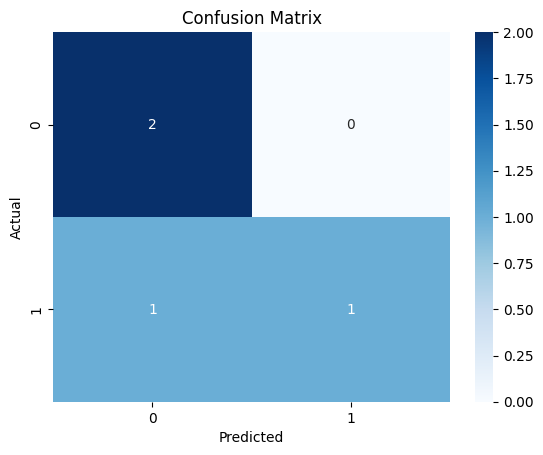

In [14]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Scratch Implementation of Logistic Regression

In [15]:
import numpy as np

In [26]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, n):
        self.w = np.zeros((n, 1))
        self.b = 0

    def propagate(self, X, Y):
        m = X.shape[1]

        # Forward propagation
        A = self.sigmoid(np.dot(self.w.T, X) + self.b)
        cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

        # Backward propagation
        dw = 1/m * np.dot(X, (A - Y).T)
        db = 1/m * np.sum(A - Y)

        cost = np.squeeze(cost)
        grads = {"dw": dw, "db": db}

        return grads, cost

    def fit(self, X, Y):
        self.initialize_parameters(X.shape[0])
        costs = []

        for i in range(self.num_iterations):
            grads, cost = self.propagate(X, Y)

            # Retrieve derivatives from grads
            dw = grads["dw"]
            db = grads["db"]

            # Update parameters
            self.w = self.w - self.learning_rate * dw
            self.b = self.b - self.learning_rate * db

            # Record the cost
            if i % 100 == 0:
                costs.append(cost)
                print(f"Cost after iteration {i}: {cost}")

        self.params = {"w": self.w, "b": self.b}
        self.grads = {"dw": dw, "db": db}
        self.costs = costs

    def predict(self, X):
        m = X.shape[1]
        Y_prediction = np.zeros((1, m))
        A = self.sigmoid(np.dot(self.w.T, X) + self.b)

        for i in range(A.shape[1]):
            Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

        return Y_prediction

    def accuracy(self, Y_true, Y_pred):
        return 100 - np.mean(np.abs(Y_pred - Y_true)) * 100


In [27]:
LogisticRegression()

In [28]:
# Generate some synthetic data for example
np.random.seed(1)
X_train = np.random.randn(2, 100)
Y_train = (np.dot(np.array([[0.3, 0.7]]), X_train) + 0.5 > 1).astype(int)
X_test = np.random.randn(2, 50)
Y_test = (np.dot(np.array([[0.3, 0.7]]), X_test) + 0.5 > 1).astype(int)

# Create logistic regression model
log_reg = LogisticRegression(learning_rate=0.01, num_iterations=1000)

# Train the model
log_reg.fit(X_train, Y_train)

# Predict on the training set
Y_train_pred = log_reg.predict(X_train)
train_accuracy = log_reg.accuracy(Y_train, Y_train_pred)
print(f"Train Accuracy: {train_accuracy}%")

# Predict on the test set
Y_test_pred = log_reg.predict(X_test)
test_accuracy = log_reg.accuracy(Y_test, Y_test_pred)
print(f"Test Accuracy: {test_accuracy}%")


Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5888048134016538
Cost after iteration 200: 0.5173442918649761
Cost after iteration 300: 0.4662159378151969
Cost after iteration 400: 0.42793220727990294
Cost after iteration 500: 0.39811688680328644
Cost after iteration 600: 0.37413805694983276
Cost after iteration 700: 0.3543455747617499
Cost after iteration 800: 0.3376606565216638
Cost after iteration 900: 0.3233506340562204
Train Accuracy: 94.0%
Test Accuracy: 98.0%
